## 数据清理和整理
任务：
- 转换成`df`，每个元素是时间和内容的二元项
- 删除标点获得`df_d`
- 台词的一元列表`all_serifu_list`，统计每个台词的数量`serifu_counter`

In [118]:
# srt的处理
# 把srt文件每行扫描，遇到空行后，直到下一个空行出现都不打印两个空行间的内容，遇到第二个后，之后的每行都打印，直到下一个空行出现，重复上述过程
def delte_even(file):
    with open(file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    newfile = file.replace('.srt', '_new.srt')
    with open(newfile, 'w', encoding='utf-8') as f:
        flag = 0
        for line in lines:
            if flag % 2 == 0:
                f.write(line)
            if line == '\n':
                flag += 1

            
# file = 'E:\\影视\\save\\进击的巨人\\subtitle\\[SubtitleTools.com] Shingeki no Kyojin OAD - 01 (0.5A) BD 1920x1080 x265-10Bit Flac.srt'
# delte_even(file)

In [119]:
import os
import pandas as pd

def parse_srt_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    entries = []
    i = 0
    while i < len(lines):
        if lines[i].strip().isdigit():
            time_range = lines[i + 1].strip()
            subtitle = lines[i + 2].strip()
            entries.append((time_range, subtitle))
            i += 4
        else:
            i += 1
    return entries

# 列出当前目录中的所有文件
directory = 'E:\\Github\\animecomment\\進撃の巨人\\subtitle'
files = os.listdir(directory)

# 筛选出以 "進撃の巨人" 开头并以 ".srt" 结尾的文件
srt_files = [file for file in files if file.startswith("進撃の巨人") and file.endswith(".srt")]

# 排除掉 進撃の巨人-シーズン7 开头的文件
srt_files = [file for file in srt_files if not file.startswith("進撃の巨人-シーズン7")]

# 加入完結編的文件
srt_files += [file for file in files if file.startswith("進撃の巨人-シーズン8") and file.endswith(".srt")]

# 加入ovd
srt_files += [file for file in files if file.startswith("進撃の巨人-シーズンOAD") and file.endswith(".srt")]

# 创建一个字典来存储每个文件的二元列表
srt_data = {}

for srt_file in srt_files:
    file_path = os.path.join(directory, srt_file)
    srt_data[srt_file] = parse_srt_file(file_path)

# 将字典转换为 DataFrame
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in srt_data.items()]))

# 显示 DataFrame
print(df)

                進撃の巨人-シーズン1-01-二千年後の君へ～シガンシナ陥落1～_ja.srt  \
0     (00:00:26,426 --> 00:00:30,263, （アルミン）その日 人類は思...   
1        (00:00:36,169 --> 00:00:39,105, （アルミン）奴(やつ)らに)   
2          (00:00:41,541 --> 00:00:44,110, （アルミン）鳥籠の中に)   
3                  (00:00:44,811 --> 00:00:46,112, 屈辱を)   
4        (00:01:04,730 --> 00:01:06,299, （キース）総員 戦闘用意！)   
...                                                 ...   
1020                                                NaN   
1021                                                NaN   
1022                                                NaN   
1023                                                NaN   
1024                                                NaN   

                    進撃の巨人-シーズン1-02-その日～シガンシナ陥落2～_ja.srt  \
0     (00:00:06,172 --> 00:00:08,375, （アルミン）今から100年以...   
1          (00:00:09,075 --> 00:00:11,678, 人類にある天敵が現れた)   
2            (00:00:16,750 --> 00:00:21,688, 彼らと人類の間には)   
3     (00:00:22,355 --> 00:00:25,725, たちまち人類は絶滅の危機を迎えた)

In [120]:
# 打印第87集的字幕 检查空格是否正确
print(df['進撃の巨人-シーズン6-87-人類の夜明け_ja.srt'])

0                 (00:00:08,007 --> 00:00:10,260, ‎（ミカサ）)
1               (00:00:11,803 --> 00:00:13,304, ‎私もそう思った)
2       (00:00:14,764 --> 00:00:18,852, ‎でも それは違うのかもしれない)
3              (00:00:32,824 --> 00:00:35,618, ‎エレンは最初から)
4       (00:00:36,578 --> 00:00:39,039, ‎あれがエレン本来の姿だとしたら)
                              ...                        
1020                                                  NaN
1021                                                  NaN
1022                                                  NaN
1023                                                  NaN
1024                                                  NaN
Name: 進撃の巨人-シーズン6-87-人類の夜明け_ja.srt, Length: 1025, dtype: object


In [121]:
# 删除空内容
df_d = df.dropna()

In [122]:
import re
# 删除二元项中第二个参数的（）中的内容
df_d = df_d.map(lambda x: (x[0], re.sub(r'\（.*?\）', '', x[1])) if isinstance(x, tuple) and len(x) == 2 else x)
# 删除二元项中第二个参数的\u200e
df_d = df_d.map(lambda x: (x[0], re.sub(r'\u200e', '', x[1])) if isinstance(x, tuple) and len(x) == 2 else x)
print(df_d['進撃の巨人-シーズン6-87-人類の夜明け_ja.srt'])

0                      (00:00:08,007 --> 00:00:10,260, )
1               (00:00:11,803 --> 00:00:13,304, 私もそう思った)
2       (00:00:14,764 --> 00:00:18,852, でも それは違うのかもしれない)
3              (00:00:32,824 --> 00:00:35,618, エレンは最初から)
4       (00:00:36,578 --> 00:00:39,039, あれがエレン本来の姿だとしたら)
                             ...                        
223              (00:13:12,625 --> 00:13:13,709, 彼らは ただ)
224    (00:13:13,793 --> 00:13:18,714, エルディア帝国に交配を強いられた)
225            (00:13:19,423 --> 00:13:24,011, 依然 憎むべきは)
226          (00:13:24,261 --> 00:13:28,682, 忌むべきは百年前より)
227               (00:13:29,099 --> 00:13:32,853, 我々の敵は)
Name: 進撃の巨人-シーズン6-87-人類の夜明け_ja.srt, Length: 228, dtype: object


In [123]:
# 删除所有非日文汉字或假名的字符
# df_d = df_d.map(lambda x: (x[0], re.sub(r'[^\u4E00-\u9FFF\u3040-\u309F\u30A0-\u30FF]', '', x[1])) if isinstance(x, tuple) and len(x) == 2 else x)
df_d = df_d.map(lambda x: (x[0], re.sub(r'[^\u4E00-\u9FFF\u3040-\u309F\u30A0-\u30FF\u0030-\u0039\uFF10-\uFF19\u3000-\u303F\uFF01-\uFF60]', '', x[1])) if isinstance(x, tuple) and len(x) == 2 else x)
print(df_d['進撃の巨人-シーズン6-87-人類の夜明け_ja.srt'])

0                      (00:00:08,007 --> 00:00:10,260, )
1               (00:00:11,803 --> 00:00:13,304, 私もそう思った)
2        (00:00:14,764 --> 00:00:18,852, でもそれは違うのかもしれない)
3              (00:00:32,824 --> 00:00:35,618, エレンは最初から)
4       (00:00:36,578 --> 00:00:39,039, あれがエレン本来の姿だとしたら)
                             ...                        
223               (00:13:12,625 --> 00:13:13,709, 彼らはただ)
224    (00:13:13,793 --> 00:13:18,714, エルディア帝国に交配を強いられた)
225             (00:13:19,423 --> 00:13:24,011, 依然憎むべきは)
226          (00:13:24,261 --> 00:13:28,682, 忌むべきは百年前より)
227               (00:13:29,099 --> 00:13:32,853, 我々の敵は)
Name: 進撃の巨人-シーズン6-87-人類の夜明け_ja.srt, Length: 228, dtype: object


In [124]:
# 确保所有的二元项都是字符串
df_d = df_d.map(lambda x: (x[0], str(x[1])) if isinstance(x, tuple) and len(x) == 2 else x)
print(df_d['進撃の巨人-シーズン6-87-人類の夜明け_ja.srt'])

0                      (00:00:08,007 --> 00:00:10,260, )
1               (00:00:11,803 --> 00:00:13,304, 私もそう思った)
2        (00:00:14,764 --> 00:00:18,852, でもそれは違うのかもしれない)
3              (00:00:32,824 --> 00:00:35,618, エレンは最初から)
4       (00:00:36,578 --> 00:00:39,039, あれがエレン本来の姿だとしたら)
                             ...                        
223               (00:13:12,625 --> 00:13:13,709, 彼らはただ)
224    (00:13:13,793 --> 00:13:18,714, エルディア帝国に交配を強いられた)
225             (00:13:19,423 --> 00:13:24,011, 依然憎むべきは)
226          (00:13:24,261 --> 00:13:28,682, 忌むべきは百年前より)
227               (00:13:29,099 --> 00:13:32,853, 我々の敵は)
Name: 進撃の巨人-シーズン6-87-人類の夜明け_ja.srt, Length: 228, dtype: object


In [125]:
# 所有台词列表
all_serifu_list = []
for col in df_d.columns:
    all_serifu_list.extend(df_d[col].apply(lambda x: x[1] if isinstance(x, tuple) and len(x) == 2 else '').tolist())

print(all_serifu_list[110:150])


['ああっ！', 'それだけしか取り返せませんでした', '', 'でも息子は', '役に立ったんですよね？', '何か直接の手柄てがらはなくても', '息子の死は人類の', 'もちろん！', 'いや', '今回の調査で我々はいや', '今回も', '何の成果も得られませんでした！', '私が無能なばかりに', '奴らの正体を', '突き止めることができませんでした！', 'ひでえもんだな', '全くだ', 'これじゃあ俺らの税で奴らに', 'えいっ', '何すんだクソガキ！', 'うう！うわっ', 'おいっ何だよミカサ！', 'おい！戻ってこいコラー！', 'ミカサもういいだろ！', 'うわーっ！', '何すんだよ！', 'エレン調査兵団に', '手伝えよ拾うの', '手伝うほど無いじゃない', 'ただいま', 'おかえりなさい', 'あらエレン今日は', 'ああ', 'いっ！何だよ！', '耳が赤かったウソついた証拠', 'ミカサに手伝ってもらったのね', 'あれ？父さん出かけるの？', '仕事？', 'ああ内地へ診療だ', 'ふーん']


In [126]:
# 把 all_serifu_list 这个列表进行重复元素的数量统计
from collections import Counter
serifu_counter = Counter(all_serifu_list)
print(serifu_counter.most_common(100))
# 删除指定的台词
serifu_to_delete = [
    '','あっ', 'ああ', 'あ', 'うっ', 'はっ', 'ん', 'はい', 'おい', 'うん', 
    'くっ', 'ハッ', 'えっ', 'ううっ', 'ああっ', 'うわっ', 'うわ', 'うう', 
    'ハアハア', 'うお', 'クソッ', 'うっうう', 'ぐっ', 'んっ', 'あああ', 
    'んんっ', 'うおおお', 'うあっ', 'ウオオオ', 'ちっ', 'ウアアアアー', 
    'ハア', 'ハァ', 'ふっ', 'うあ', 'おお',
    'え','は','なっ'
]
for serifu in serifu_to_delete:
    del serifu_counter[serifu]
print(serifu_counter.most_common(100))

[('', 1918), ('あっ', 229), ('ああ', 119), ('〜', 106), ('え？', 103), ('あ', 102), ('～', 84), ('エレン', 78), ('うっ', 70), ('はっ', 58), ('はい', 54), ('ん？', 53), ('くっ', 44), ('エレン！', 41), ('うん', 39), ('そうか', 32), ('はっ！', 32), ('アルミン', 31), ('ハッ！', 31), ('おい', 28), ('は？', 27), ('そうだ', 27), ('いや', 24), ('えっ？', 24), ('うっ！', 21), ('おい！', 21), ('あっ！', 21), ('ハアハア', 21), ('まさか', 20), ('うわっ', 19), ('はあ？', 19), ('ああっ！', 18), ('ううっ', 18), ('なっ', 18), ('ううっ！', 18), ('そんな', 17), ('エレン？', 16), ('ハッ', 16), ('でも', 15), ('ああっ', 15), ('ミカサ', 14), ('しかし', 14), ('えっ', 14), ('うっうう', 14), ('兵長', 14), ('了解！', 14), ('うう', 14), ('うお〜！', 14), ('っ', 14), ('これは', 13), ('うわっ！', 13), ('いいや', 13), ('ごめん', 12), ('それは', 12), ('心臓を捧げよ！', 12), ('うわ〜！', 12), ('クソッ', 11), ('え', 11), ('ジャン！', 11), ('だから', 11), ('つまり', 11), ('俺は', 11), ('ライナー', 11), ('ええ', 11), ('私たちは', 11), ('そして', 10), ('行くぞ！', 10), ('あ？', 10), ('このままじゃ', 10), ('アニ', 10), ('くっ！', 10), ('リヴァイ', 10), ('エルヴィン', 10), ('分かった', 10), ('コニー！', 10), ('ユミル', 10), ('ライナー！', 10)

## 分词操作
上方是台词整体的数量统计，此处为分词分析。
调整分词效果，让不同的活用动词整合，以及专有名词的添加，需要一些额外技术，根据[这篇博客](https://eneprog.blogspot.com/2018/07/1-pythongensimphrasesjanome.html)，可能是版本问题，`from gensim.models.phrases import Phrases , Phraser`报错，暂时不做探究。

In [127]:
from janome.tokenizer import Tokenizer
from janome.dic import UserDictionary
from collections import Counter

# 加载默认系统词典
tokenizer = Tokenizer("E:\\Github\\animecomment\\進撃の巨人\\kyojin_dict.csv", udic_enc="utf8")
# tokenizer = Tokenizer()

In [128]:
# 使用janome分词
text = ' '.join(all_serifu_list)

# 解析文本
tokens = tokenizer.tokenize(text, wakati=False)

In [129]:
# 通过词性过滤
meaningful_words = [
    token.surface for token in tokens
    if ("名詞" in token.part_of_speech or 
        "動詞,自立" in token.part_of_speech or
        "形容詞,自立" in token.part_of_speech or
        "副詞,一般" in token.part_of_speech)
]

counter = Counter(meaningful_words)
print(counter.most_common(100))

[('し', 783), ('巨人', 701), ('ん', 629), ('俺', 622), ('お前', 617), ('の', 550), ('エレン', 539), ('こと', 522), ('私', 508), ('何', 495), ('たち', 420), ('人', 368), ('それ', 348), ('する', 331), ('これ', 270), ('今', 270), ('ら', 262), ('うっ', 249), ('壁', 248), ('ここ', 244), ('もう', 230), ('いい', 222), ('ある', 188), ('ない', 181), ('さ', 175), ('人類', 173), ('我々', 169), ('力', 165), ('やっ', 156), ('なっ', 152), ('兵団', 151), ('マーレ', 149), ('い', 142), ('ため', 140), ('誰', 138), ('お', 134), ('調査', 132), ('者', 130), ('よう', 126), ('中', 125), ('言っ', 120), ('前', 119), ('あんた', 117), ('ライナー', 117), ('ユミル', 117), ('世界', 116), ('さん', 112), ('～', 111), ('年', 110), ('自分', 109), ('見', 108), ('あなた', 107), ('ミカサ', 106), ('エルディア', 106), ('アルミン', 105), ('まま', 100), ('あれ', 99), ('ヤツ', 99), ('兵', 96), ('僕', 96), ('敵', 96), ('島', 95), ('外', 93), ('リヴァイ', 93), ('なん', 92), ('くっ', 92), ('始祖', 91), ('分かっ', 90), ('とき', 90), ('ジーク', 90), ('できる', 89), ('みんな', 88), ('こいつ', 88), ('ー', 87), ('なる', 87), ('全て', 87), ('アニ', 86), ('班', 83), ('でき', 83), ('１

In [130]:
stopwords = set(['の', 'に', 'は', 'を', 'た', 'が', 'で', 'て', 'と', 'し', 'れ', 'さ', 'ある', 'いる', 'も', 'する', 'から', 'な', 'こと', 'として', 'い', 'や', 'れる', 'など', 'なっ', 'ない', 'この', 'ため', 'その', 'あっ', 'よう', 'また', 'もの', 'という', 'あり', 'まで', 'られ', 'なる', 'へ', 'か', 'だ', 'これ', 'まで', 'それ','何','もう','じゃ','だけ','ん','私','今','でも','ここ','なら','たら','つまり','だから','たち','え','ら','どう','おい','です','ぞ','','まま','ねえ','あれ','いや','あなた','以上','あだ','そう','うっ','分かっ','やっ','いい','くっ','言っ'
,'俺','我','君','僕','者','話','彼','ヤツ','思っ','人','お前','我々','みんな','あいつ','誰','あんた','自分','見','できる','まあ','もん','中','前','先','思う','分から','知っ','貴様','しれ','さっき','うう','言う'
,'来','言う','でき','わけ','次回','すれ','もっと','ちょっと','なん','そいつ','的','持つ','ところ','こっち','お','なり','さん','数','いっ','知ら','確か','奴','こいつ','みたい','体','ほか','今回','気','奴ら','どおり','気','すま','とき','そこ','本当に','なんで','どうして','まさか','はず','あと',
# "エレン","エレン・イェーガー","エレンイェーガー","ミカサ","アルミン","リヴァイ","ハンジ","エルヴィン","ジャン","コニー","サシャ","アニ","ライナー","ベルトルト","ユミル","ヒストリア","フリッツ","グリシャ","ケニー","ピーク","ポルコ","ジーク","ファルコ","ガビ",
# "マーレ", "ダイバー", "エルディア", 
])
# 过滤停用词
filtered_word_list = [word for word in meaningful_words if word not in stopwords]
counter = Counter(filtered_word_list)
print(counter.most_common(100))

[('巨人', 701), ('エレン', 539), ('壁', 248), ('人類', 173), ('力', 165), ('兵団', 151), ('マーレ', 149), ('調査', 132), ('ライナー', 117), ('ユミル', 117), ('世界', 116), ('～', 111), ('年', 110), ('ミカサ', 106), ('エルディア', 106), ('アルミン', 105), ('兵', 96), ('敵', 96), ('島', 95), ('外', 93), ('リヴァイ', 93), ('始祖', 91), ('ジーク', 90), ('ー', 87), ('全て', 87), ('アニ', 86), ('班', 83), ('１', 82), ('２', 81), ('どこ', 80), ('区', 80), ('作戦', 79), ('ジャン', 77), ('兵士', 75), ('違う', 73), ('しろ', 71), ('兵長', 71), ('ダメ', 70), ('エルヴィン', 70), ('訓練', 69), ('一', 69), ('行く', 68), ('早く', 68), ('手', 68), ('日', 64), ('バカ', 64), ('女', 64), ('よく', 63), ('憲兵', 61), ('待っ', 61), ('悪魔', 61), ('命', 59), ('団長', 59), ('人間', 56), ('大丈夫', 56), ('家', 56), ('目', 54), ('ファルコ', 53), ('ガビ', 53), ('殺し', 51), ('方', 51), ('考え', 50), ('時間', 50), ('王', 50), ('死ん', 49), ('子', 49), ('立体', 48), ('待て', 48), ('馬', 48), ('機動', 47), ('状況', 46), ('とおり', 46), ('出', 45), ('鎧', 45), ('団', 44), ('やる', 44), ('戦士', 44), ('生き', 43), ('ウォール', 43), ('仲間', 43), ('ハンジ', 43), ('ヒストリア', 43)

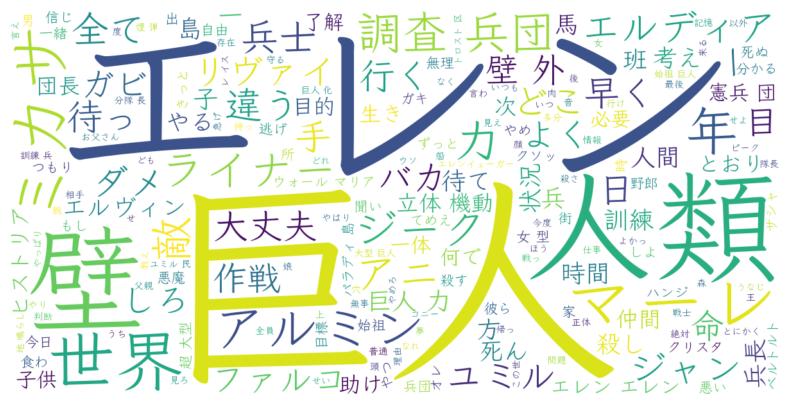

In [131]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 用空格连结所有词
cloudwords = ' '.join(filtered_word_list)

# 生成词云图
wordcloud = WordCloud(font_path='E:\\Github\\animecomment\\others\\LXGWWenKai-Light.ttf', width=1200, height=600, background_color='white').generate(cloudwords)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 寻找关键词呼应

In [132]:
import pandas as pd

keywords = [
    ["自由"],
    ["駆逐"],
    ["殺す","殺し"],
    ["進撃"],
    ["奴隷"],
    ["記憶", "きおく", "キオク"],
    ["未来", "ミライ"],
    ["うんざり", "うんざり", "ウンザリ"],
    ["壁", "かべ", "カベ"],
    ["外に", "外へ","外の","外で","外だ","外か","外が","外は","外を","外に","外まで","外側","外出","外も","と外"],
    ["海", "うみ", "ウミ"],
    ["敵"],
    ["同じ"],
    ["悪魔", "あくま", "アクマ"],
    ["進む", "進め"], 
    ["戦士"], 
    ["兵士"], 
    ["死"],
    ["生きる","生きろ","生きよう","生きたい","生きた","生きます","生きて","生きな"], 
    ["子ども", "こども", "子供"],
    ["森"],
    # ["空だ","空か","空が","空は","空を","空に","空へ","空まで"],
    ["鳥"],
    ["鍵", "カギ"],
    ["家族"],
    ["愛"],
    ["優し"],
    ["未練"],
    ["守る", "守れ", "守り", "守って"],
    ["また"]
]

# 1. 创建字典，以每个小列表的第一个关键词为键，其他关键词为值
data = {k[0]: k for k in keywords}

# 2. 找出最长的关键词列表长度，保证 DataFrame 的列对齐
max_len = max(len(v) for v in data.values())

# 3. 使用 `None` 填充较短的列，使所有列等长
for key in data:
    data[key] += [None] * (max_len - len(data[key]))

# 4. 转换成 DataFrame
keywords_df = pd.DataFrame(data)

print("keywords_df:")
print(keywords_df)

# 5. 创建 find_df，初始值全部为空列表，长度与 keywords_df 保持一致
find_df = pd.DataFrame([[[] for _ in range(len(keywords_df.columns))]], columns=keywords_df.columns)

print(find_df)



keywords_df:
      自由    駆逐    殺す    進撃    奴隷    記憶    未来  うんざり     壁   外に  ...   子ども  \
0     自由    駆逐    殺す    進撃    奴隷    記憶    未来  うんざり     壁   外に  ...   子ども   
1   None  None    殺し  None  None   きおく   ミライ  うんざり    かべ   外へ  ...   こども   
2   None  None  None  None  None   キオク  None  ウンザリ    カベ   外の  ...    子供   
3   None  None  None  None  None  None  None  None  None   外で  ...  None   
4   None  None  None  None  None  None  None  None  None   外だ  ...  None   
5   None  None  None  None  None  None  None  None  None   外か  ...  None   
6   None  None  None  None  None  None  None  None  None   外が  ...  None   
7   None  None  None  None  None  None  None  None  None   外は  ...  None   
8   None  None  None  None  None  None  None  None  None   外を  ...  None   
9   None  None  None  None  None  None  None  None  None   外に  ...  None   
10  None  None  None  None  None  None  None  None  None  外まで  ...  None   
11  None  None  None  None  None  None  None  None  None   外側  ...  None   

In [133]:
# 遍历 df_d 中的每个二元项，检测其第二个参数是否含有 keywords_df 中的关键词，如果有，则在 find_df 中的对应列中添加该二元项。
col_index = 1
# 遍历每一集
for col in df_d.columns:
    # 添加新的一行，每个数据是一个空列表
    find_df.loc[col_index] = [[] for _ in range(len(keywords_df.columns))]
    # 遍历一集的台词
    for idx, item in enumerate(df_d[col]):
        param1, param2 = item
        # 确保 param2 是字符串
        param1 = str(param1)
        param2 = str(param2)
        # 遍历 keywords_df 的每一列
        for keyword_col in keywords_df.columns:
            if any(str(keyword) in param2 for keyword in keywords_df[keyword_col]):
                templist = find_df[keyword_col][col_index]
                templist.append([param1, param2])
                find_df.loc[col_index, keyword_col] = templist
    col_index = 1 + col_index


# 打印某一列不是空列表的行
strrr = '自由'
print(find_df[strrr][find_df[strrr].apply(lambda x: len(x) > 0)])

12    [[00:10:59,759 --> 00:11:02,061, 当初の作戦どおり自由に動く...
13    [[00:10:52,418 --> 00:10:53,786, 自由だ], [00:14:...
25              [[00:13:25,938 --> 00:13:27,439, 自由ダ！]]
42       [[00:14:19,817 --> 00:14:23,279, つまり我々は自由の身だ]]
44            [[00:14:09,306 --> 00:14:10,808, お前は自由だ]]
54     [[00:09:38,953 --> 00:09:41,414, 俺は自由を取り返すためなら]]
58    [[00:09:51,424 --> 00:09:54,176, これが自由の代償だと], ...
59    [[00:00:16,140 --> 00:00:19,185, 自由を求めて進み続けた],...
68      [[00:12:55,024 --> 00:12:57,234, 考えるだけなら自由だろ？]]
72     [[00:00:39,247 --> 00:00:42,459, 体の自由が奪われ意識を失う]]
73    [[00:03:02,432 --> 00:03:03,683, 俺は自由だ], [00:0...
77     [[00:03:16,748 --> 00:03:20,548, オレたち自由になれるのか？]]
78    [[00:18:14,924 --> 00:18:18,494, これは俺の自由を妨げるもの...
79    [[00:07:14,446 --> 00:07:19,151, グリシャはお前を愛し自由に...
80            [[00:10:00,516 --> 00:10:02,518, お前は自由だ]]
83    [[00:12:47,975 --> 00:12:53,397, エレンイェーガーの創る自由...
84         [[00:04:08,873 --> 00:04:12,377, 人類の自由のために]]
87            [[00:10:34,091 --> 00:10:37,345, 全

In [134]:
# 测试插入的台词是否正确
serifutest = "当初の作戦どおり自由に"
# 从df_d中找到这句台词
for col in df_d.columns:
    for idx, item in enumerate(df_d[col]):
        param1, param2 = item
        if serifutest in str(param2):
            print(col)
            print(param1, param2)
            break

進撃の巨人-シーズン1-12-傷～トロスト区攻防戦8～_ja.srt
00:10:59,759 --> 00:11:02,061 当初の作戦どおり自由に動くんだ


In [135]:
# # 把 find_df 为 CSV 文件
# find_df.to_csv('find_df.csv', index=False, encoding='utf-8-sig')
# 把 find_df 转为markdown文件，每个副标题是一个关键词，下面是这个关键词的台词
with open('find_df.md', 'w', encoding='utf-8') as file:
    for keyword in keywords_df.columns:
        file.write(f'## {keyword}\n')
        for idx, item in enumerate(find_df[keyword]):
            if len(item) == 0:
                continue
            file.write(f'- {idx}: ')
            # 序号对应的标题 即df_d的列名 截取名词第二个-开始到_之前的内容
            text = df_d.columns[idx-1]
            start = text.rfind("-", 0, text.rfind("_"))  # 找到最后一个 "-"，但不包括 "_" 之后的部分
            end = text.rfind("_")  # 找到 "_" 的位置
            file.write(f'{text[start+1:end]}\n')
            for param1, param2 in item:
                # 把param1简化只保留开始时间
                param1 = param1.split(' --> ')[0]+':'
                file.write(f'   - {param1} {param2}\n')
            file.write('\n')


## 视频剪辑

In [145]:
def get_video_path(index):
    """根据索引返回对应的视频文件路径"""
    base_path = "E:\\影视\\save\\进击的巨人"
    mapping = [
        (1, 25, f"{base_path}\\[LY-RAW][BDRIP][Shingeki no Kyojin S1]"),
        (26, 37, f"{base_path}\\[LY-RAW][BDRIP][Shingeki no Kyojin S2]"),
        (38, 49, f"{base_path}\\[LY-RAW][BDRIP][Shingeki no Kyojin S3 part1]"),
        (50, 59, f"{base_path}\\[LY-RAW][BDRIP][Shingeki no Kyojin S3 part2]"),
        (60, 75, f"{base_path}\\[BeanSub&LoliHouse] Shingeki no Kyojin [60-75][WebRip 1080p HEVC-10bit AAC ASSx2]"),
        (76, 87, f"{base_path}\\[BeanSub&LoliHouse] Shingeki no Kyojin [76-87][WebRip 1080p HEVC-10bit AAC ASSx2]"),
        (88, 89, f"{base_path}"),
        (90, 100, f"{base_path}\\[Baws] Shingeki no Kyojin OVA (WEB 1080p HEVC FLAC)"),
    ]
    
    for start, end, folder in mapping:
        if start <= index <= end:
            return folder
    return None

def get_video_file(index):
    """根据索引返回对应的视频文件"""
    video_folder = get_video_path(index)
    if not video_folder:
        print(f"找不到第 {index} 集的视频文件夹")
        return None
    video_files = [f for f in os.listdir(video_folder) if f.endswith('.mkv') or f.endswith('.mp4')]
    
    if 1 <= index <= 59:
        pattern = re.compile(rf'\[LY-RAW\]\[BDRIP\]\[Shingeki.no.Kyojin\]\[{index:02}\]\[x265_tta\].*\.mkv')
        video_files = [f for f in video_files if pattern.match(f)]
    elif 60 <= index <= 87:
        pattern = re.compile(rf'\[BeanSub&LoliHouse\] Shingeki no Kyojin - {index:02} \[WebRip 1080p HEVC-10bit AAC ASSx2\]\.mkv')
        video_files = [f for f in video_files if pattern.match(f)]
    # 完结篇
    elif index == 88:
        video_files = ["CheeseAni_Shingeki_no_Kyojin_The_Final_Season_Kanketsu_hen_Part.mkv"]
    elif index == 89:
        video_files = ["[CheeseAni] Shingeki no Kyojin The Final Season - Kanketsu-hen [Part 2][BDRip][1080p][HEVC+OPUS].mkv"]
    elif 90 <= index <= 100:
        # [Baws] Attack on Titan S0E01 v3 - Ilse's Notebook (WEB 1080p HEVC FLAC) [D4DE11A3].mkv
        pattern = re.compile(rf'\[Baws\] Attack on Titan S0E{index - 89:02} .*\.mkv')
        video_files = [f for f in video_files if pattern.match(f)]

    return video_files[0] if video_files else None


print(get_video_path(25))
print(get_video_path(26))
print(get_video_path(40))
print(get_video_path(50))
print(get_video_path(87))
print(get_video_path(89))
print(get_video_path(92))
print("----")
print(get_video_file(2))
print(get_video_file(25))
print(get_video_file(29))
print(get_video_file(60))
print(get_video_file(87))
print(get_video_file(88))
print(get_video_file(89))
print(get_video_file(92))

E:\影视\save\进击的巨人\[LY-RAW][BDRIP][Shingeki no Kyojin S1]
E:\影视\save\进击的巨人\[LY-RAW][BDRIP][Shingeki no Kyojin S2]
E:\影视\save\进击的巨人\[LY-RAW][BDRIP][Shingeki no Kyojin S3 part1]
E:\影视\save\进击的巨人\[LY-RAW][BDRIP][Shingeki no Kyojin S3 part2]
E:\影视\save\进击的巨人\[BeanSub&LoliHouse] Shingeki no Kyojin [76-87][WebRip 1080p HEVC-10bit AAC ASSx2]
E:\影视\save\进击的巨人
E:\影视\save\进击的巨人\[Baws] Shingeki no Kyojin OVA (WEB 1080p HEVC FLAC)
----
[LY-RAW][BDRIP][Shingeki_no_Kyojin][02][x265_tta][19F98A15](1).mkv
[LY-RAW][BDRIP][Shingeki_no_Kyojin][25][x265_tta][2AFCD3BB].mkv
[LY-RAW][BDRIP][Shingeki no Kyojin][29][x265_tta][8A42DF66].mkv
[BeanSub&LoliHouse] Shingeki no Kyojin - 60 [WebRip 1080p HEVC-10bit AAC ASSx2].mkv
[BeanSub&LoliHouse] Shingeki no Kyojin - 87 [WebRip 1080p HEVC-10bit AAC ASSx2].mkv
CheeseAni_Shingeki_no_Kyojin_The_Final_Season_Kanketsu_hen_Part.mkv
[CheeseAni] Shingeki no Kyojin The Final Season - Kanketsu-hen [Part 2][BDRip][1080p][HEVC+OPUS].mkv
[Baws] Attack on Titan S0E03 v3 - Distress

In [137]:
def parse_time(time_str):
    """将时间字符串转换为秒数。"""
    hours, minutes, seconds = time_str.split(':')
    seconds1, milliseconds = seconds.split(',')
    total_seconds = int(hours) * 3600 + int(minutes) * 60 + int(seconds1) + int(milliseconds) / 1000
    return total_seconds

def format_time(SECONDS):
    """将秒数格式化为时间字符串。"""
    hours = int(SECONDS / 3600)
    minutes = int((SECONDS - hours*3600) / 60)
    seconds = int((SECONDS - hours*3600 - minutes*60))
    milliseconds = int((SECONDS - hours*3600 - minutes*60 - seconds) * 1000)
    return f"{hours:02}:{minutes:02}:{seconds:02},{milliseconds:03}"

def adjust_timestamps(timestamp_str):

    # 解析输入字符串
    start_str, end_str = timestamp_str.split(' --> ')
    
    # 转换为秒数
    start_time = parse_time(start_str)
    end_time = parse_time(end_str)

    # 视频的起始时间和结束时间（以秒为单位）
    video_start_time = 0
    video_end_time = 7200  # 2小时

    # 调整时间
    adjusted_start_time = max(start_time - 4, video_start_time)
    adjusted_end_time = min(end_time + 4, video_end_time)

    # 格式化为时间字符串
    adjusted_start_str = format_time(adjusted_start_time)
    adjusted_end_str = format_time(adjusted_end_time)

    # 持续时间
    duration = end_time - start_time + 8
    duration_str = format_time(duration)

    # 返回调整后的时间戳
    return [f"{adjusted_start_str} --> {adjusted_end_str}", duration_str]

# 示例用法
input_str = "01:02:01,509 --> 01:59:59,309"
print(adjust_timestamps(input_str)[0])
print(adjust_timestamps(input_str)[1])

01:01:57,509 --> 02:00:00,000
00:58:05,800


In [138]:
import os
import subprocess

def process_videos(find_df, target, savepath):
    """遍历DataFrame并裁剪视频"""
    target_folder = os.path.join(savepath, target)
    os.makedirs(target_folder, exist_ok=True)
    
    for index, row in find_df.iterrows():
        # print(f"Processing episode {index}...")
        if index > len(find_df):
            break
        if index == 0:
            continue
        video_folder = get_video_path(index)
        video_file = get_video_file(index)
        if not video_folder or not video_file:
            continue
        video_path = os.path.join(video_folder, video_file)
        # print(f"Video path: {video_path}")
        for item in row[target]:
            # tt = re.sub(r'[^\u4E00-\u9FFF\u3040-\u309F\u30A0-\u30FF]', '', item[1]) 万一日后改名
            tem_digit = ''.join([x for x in item[0] if x.isdigit()])
            clip_name = f"{target}_{index:02}_{tem_digit}_{item[1]}.mp4"
            new_path = os.path.join(target_folder, clip_name)
            # 检测是否存在
            if os.path.exists(new_path):
                # print(f"Clip {target}_{index:02}_{tem_digit}_{item[1]}.mp4 already exists")
                continue
            # continue
            print(f"Output path: {new_path}")
            # 计算实践戳
            adjust_time_str = adjust_timestamps(item[0])[0]
            start_time_str = adjust_time_str.split(' --> ')[0]
            end_time_str = adjust_time_str.split(' --> ')[1]
            duration_str = adjust_timestamps(item[0])[1]
            # print(f"Start time: {start_time_str}")
            # print(f"End time: {end_time_str}")
            # print(f"Duration: {duration_str}")
            # 使用ffmpeg进行视频裁剪，增加时间限制
            # 注意ffmpeg的格式和srt的时间戳格式不一样！！！！特别是逗号和点的区别
            start_time_str = start_time_str.replace(',', '.')
            duration_str = duration_str.replace(',', '.')
            try:
                ffmpeg_command = [# 每个大约32M
                    'ffmpeg', 
                    '-i', video_path, 
                    '-ss', start_time_str, 
                    '-t', duration_str,
                    '-c:v', 'libx264', 
                    '-crf', '12', 
                    '-preset', 'slow',
                    '-c:a', 'aac', 
                    '-b:a', '192k', 
                    '-movflags', '+faststart', 
                    new_path
                ]
                subprocess.run(ffmpeg_command, check=True)
            except Exception as e:
                print(f"Error processing episode {index}: {e}")

# 示例调用
savepath = 'D:\\進撃の巨人clips'
# process_videos(find_df, "奴隷", savepath)
for target in keywords_df.columns:
    process_videos(find_df, target, savepath)

In [58]:
# # 输入字幕文件srt，把所有时间戳都提前5.8秒
# def adjust_srt_timestamps(srt_path):
#     """将srt文件中的所有时间戳提前5.8秒。"""
#     # 读取srt文件
#     with open(srt_path, 'r', encoding='utf-8') as file:
#         lines = file.readlines()

#     # 调整时间戳
#     adjusted_lines = []
#     for line in lines:
#         if ' --> ' in line:
#             start_str, end_str = line.split(' --> ')
#             start_time = parse_time(start_str) - 5.8
#             end_time = parse_time(end_str) - 5.8
#             adjusted_start_str = format_time(start_time)
#             adjusted_end_str = format_time(end_time)
#             adjusted_lines.append(f"{adjusted_start_str} --> {adjusted_end_str}\n")
#         else:
#             adjusted_lines.append(line)
    
#     # 保存调整后的srt文件
#     adjusted_path = srt_path.replace('.srt', '_adjusted.srt')
#     with open(adjusted_path, 'w', encoding='utf-8') as file:
#         file.writelines(adjusted_lines)
# srt_path = 'E:\\Github\\animecomment\\進撃の巨人\\subtitle\\進撃の巨人-シーズン7-final-2.srt'
# adjust_srt_timestamps(srt_path)

In [23]:
# 遍历savepath中的每个文件夹中的文件，删除含有_88_和_89_的文件
# 注释防止失误运行
# savepath = 'D:\\進撃の巨人clips'
# import os
# def delete_specific_files(root_path):
#     for foldername, subfolders, filenames in os.walk(root_path):
#         for filename in filenames:
#             if '_88_' in filename or '_89_' in filename:
#                 file_path = os.path.join(foldername, filename)
#                 try:
#                     os.remove(file_path)
#                     print(f'Deleted: {file_path}')
#                 except Exception as e:
#                     print(f'Error deleting {file_path}: {e}')
# delete_specific_files(savepath)

In [ ]:
# 备用，批量改名
# from pathlib import Path

# # 指定文件夹路径
# folder_path = Path("D:\\進撃の巨人clips\\外に")  # 请替换 "path" 为你的实际文件夹路径

# # 遍历所有 .mp4 文件
# for file in folder_path.glob("*.mp4"):
#     if file.stem.startswith("外_"):  # 检查文件名前缀是否为 "外_"
#         new_name = f"外に_{file.stem[2:]}.mp4"  # 替换文件名
#         new_path = file.with_name(new_name)  # 生成新路径
#         file.rename(new_path)  # 重命名文件
#         print(f"重命名: {file.name} -> {new_name}")
# print("所有符合条件的文件已重命名完成！")


## 制作新字幕以及合并视频
想了下，还是脱离find_df，浏览本地文件来制作比较好。防止还是有些没能过滤掉，多剪出来的片段。

拼接效果非常差，也算是ffmeg一直以来的不足，放弃吧，导入PR导出吧。

In [28]:
import os 
import subprocess
# 根据文件名计算时长
def timeleng(filename):
    parts = filename.split('_')
    timestamp = parts[2]
    #把形如001438252001440421的形式转换成00:14:38,252 --> 00:14:40,421
    start_str_time = f"{timestamp[:2]}:{timestamp[2:4]}:{timestamp[4:6]},{timestamp[6:9]}"
    end_str_time = f"{timestamp[9:11]}:{timestamp[11:13]}:{timestamp[13:15]},{timestamp[15:]}"
    start_time = parse_time(start_str_time)
    end_time = parse_time(end_str_time)
    duration = end_time - start_time
    return duration #注意是选中台词的长度，而不是片段所有台词的长度，不用+8

# 计算新视频中片段的时间戳
def newtimestamp(startstrtime, filename):
    start_time = parse_time(startstrtime)
    end_time = start_time + timeleng(filename)
    end_str_time = format_time(end_time)
    return f"{startstrtime} --> {end_str_time}"

# 连结片段组成视频
def concat_clips(column_name, savepath):
    # 用于存储视频片段的文件夹
    clips_folder = os.path.join(savepath, column_name)
    # 找到所有的视频片段
    clips = [os.path.join(clips_folder, f) for f in os.listdir(clips_folder) if f.endswith('.mp4')]
    # 生成视频片段列表文件
    clips_file = os.path.join(clips_folder, 'clips.txt')
    with open(clips_file, 'w', encoding='utf-8') as f:
        for clip in clips:
            f.write(f"file '{clip}'\n")
    # 使用ffmpeg连接视频片段
    try:
        ffmpeg_command = [
            'ffmpeg',
            '-f', 'concat',
            '-safe', '0',
            '-i', clips_file,
            '-c:v', 'libx264',
            '-preset', 'fast',
            '-crf', '15',
            '-c:a', 'aac',
            '-b:a', '192k',
            '-af', 'apad',
            '-shortest',
            os.path.join(savepath, f'{column_name}.mp4')
        ]
        subprocess.run(ffmpeg_command, check=True)
    except Exception as e:
        print(f"Error concatenating clips: {e}")

# 生成新的字幕文件
def new_srt(column_name, savepath):
    # 用于存储视频片段的文件夹
    clips_folder = os.path.join(savepath, column_name)
    # 找到所有的视频片段
    clipnames = [f for f in os.listdir(clips_folder) if f.endswith('.mp4')]
    subtitles_file = os.path.join(savepath, f'{column_name}.srt')
    with open(subtitles_file, 'w', encoding='utf-8') as f:
        startstrtime = "00:00:04,000"
        for index, clip_name in enumerate(clipnames):
            print(clip_name)
            f.write(f"{index + 1}\n")
            newtime_stamp = newtimestamp(startstrtime, clip_name)
            f.write(f"{newtime_stamp}\n")
            parts = clip_name.split('_')
            #parts[3]中.之前的内容
            content = parts[3].split('.')[0]
            f.write(f"{content}\n\n")
            startstrtime = format_time(parse_time(startstrtime) + timeleng(clip_name) + 8)
    print(f"New subtitles Finished: {subtitles_file}")

In [ ]:
savepath = 'D:\\進撃の巨人clips'
column_name = "未来"
# concat_clips(column_name, savepath)
new_srt(column_name, savepath)

未来_01_001713298001718337_この壁の中は未来永劫えいごう安全だと.mp4
未来_36_000413294000415838_この壁の中に未来はねえんだよ！.mp4
未来_42_000418216000421135_壁内の未来を.mp4
未来_61_001224034001226120_この真っ暗な俺たちの未来から.mp4
未来_67_001239675001242011_この真っ暗な俺たちの未来から.mp4
未来_70_000738040000739834_我々の未来は開かれた.mp4
未来_71_000724694000727530_皆でエルディアの未来を.mp4
未来_74_001202805001205099_未来のための戦いだって.mp4
未来_79_001600439001604376_進撃の巨人は未来の継承者の記憶をも.mp4
未来_79_001609981001612881_未来を知ることが可能なのだ.mp4
未来_79_001616455001619758_未来だと？.mp4
未来_79_001645851001649721_そういう未来だと決まっている.mp4
未来_80_000332462000335673_もっと先の未来を見たからだ.mp4
未来_80_000442740000445576_どんな未来の景色を見たか.mp4
未来_87_000820958000823002_もちろんそんな未来を.mp4
未来_88_000359172000402909_未来の記憶で見たことがある.mp4
未来_88_000459499000502969_未来は変わらないらしい.mp4
New subtitles Finished: D:\進撃の巨人clips\未来.srt
